In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import rc, font_manager
rc('font',family="NanumSquareR")
from datetime import datetime
import os
from sklearn.linear_model import LinearRegression
import scipy.stats as st
#-*- coding: utf-8 -*-
from tqdm import tqdm

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

In [4]:
%%time
os.chdir("C:\\Users\\PC\\Documents\\마이크로소프트")
train = pd.read_csv('train.csv', dtype=dtypes)

Wall time: 3min 42s


In [5]:
del dtypes['HasDetections']
test = pd.read_csv('test.csv', dtype=dtypes)

In [6]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 2363.03 Mb (0.0% reduction)
Mem. usage decreased to 2111.09 Mb (0.0% reduction)


In [7]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,1730,95.141637,95.141637,float16
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
71,Census_ThresholdOptIn,2,63.524472,63.524472,float16
75,Census_IsWIMBootEnabled,2,63.439038,63.439038,float16
31,SmartScreen,21,35.610795,48.379658,category
15,OrganizationIdentifier,49,30.841487,47.037662,float16
29,SMode,2,6.027686,93.928812,float16


Some variables like PuaMode have too much NA values, so we will drop 

In [7]:
categorical_variables=[]
for i in test.columns:
    if (train[i].isnull().mean()<0.95)&(train[i].isnull().mean()>0.05) &(test[i].isnull().mean()<0.95)&(test[i].isnull().mean()>0.05):
        train["is_null"+i]=train[i].isnull().astype(int)
        test["is_null"+i]=test[i].isnull().astype(int)

In [8]:
[x for x in train.columns if 'is_null' in x]

['is_nullOrganizationIdentifier',
 'is_nullSMode',
 'is_nullSmartScreen',
 'is_nullCensus_InternalBatteryType',
 'is_nullCensus_IsFlightingInternal',
 'is_nullCensus_ThresholdOptIn',
 'is_nullCensus_IsWIMBootEnabled']

In [9]:
def draw_categorical(i):
    print(train[i].value_counts().head())
    f,ax=plt.subplots(1,2,figsize=(10,5))
    train[[i,'HasDetections']].groupby([i]).mean().plot.bar(ax=ax[0])
    ax[0].set_title('HasDetections vs '+i)
    sns.countplot(i,hue='HasDetections',data=train,ax=ax[1])
    ax[1].set_title(i+':not found vs found')
    plt.show()

0    6169965
1    2751518
Name: is_nullOrganizationIdentifier, dtype: int64


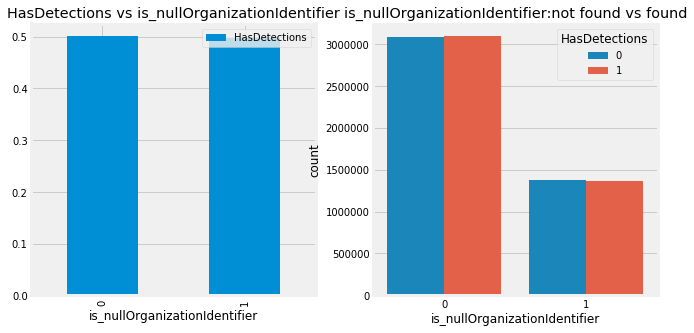

0    8383724
1     537759
Name: is_nullSMode, dtype: int64


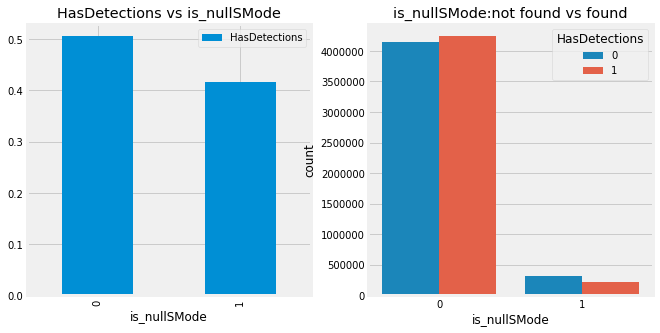

0    5744472
1    3177011
Name: is_nullSmartScreen, dtype: int64


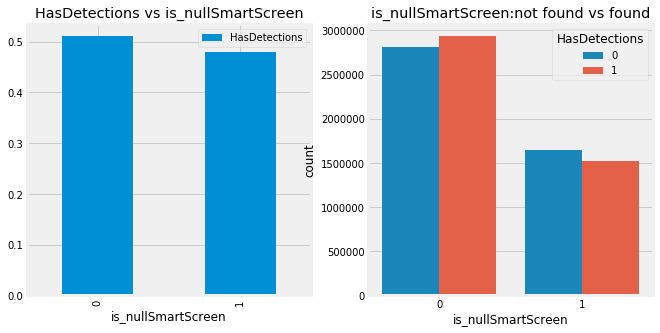

1    6338429
0    2583054
Name: is_nullCensus_InternalBatteryType, dtype: int64


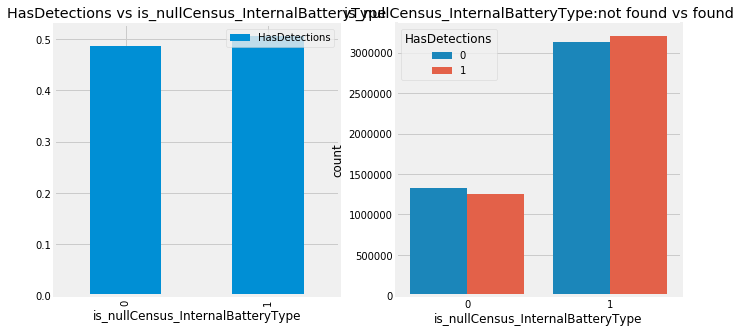

1    7408759
0    1512724
Name: is_nullCensus_IsFlightingInternal, dtype: int64


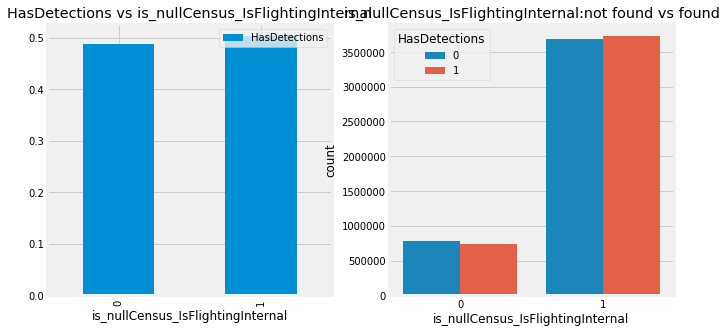

1    5667325
0    3254158
Name: is_nullCensus_ThresholdOptIn, dtype: int64


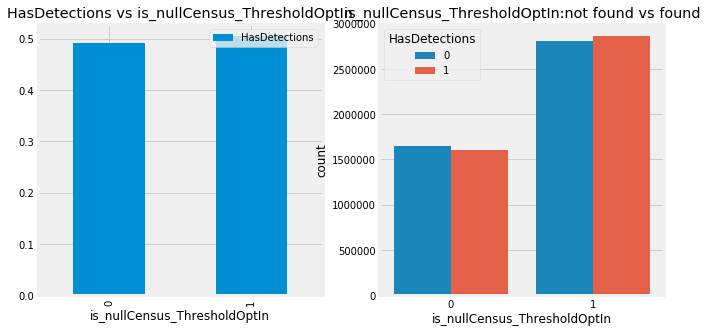

1    5659703
0    3261780
Name: is_nullCensus_IsWIMBootEnabled, dtype: int64


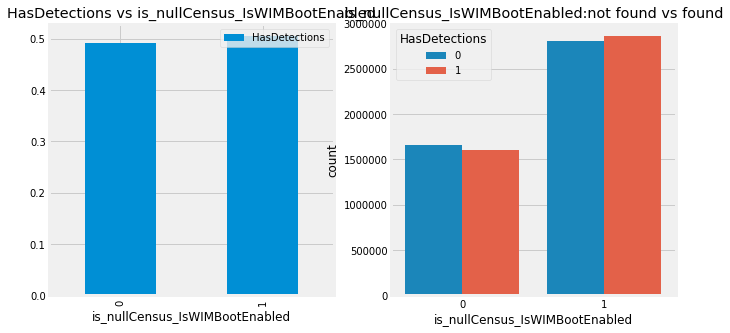

In [10]:
draw_categorical('is_nullOrganizationIdentifier')
draw_categorical('is_nullSMode')
draw_categorical('is_nullSmartScreen')
draw_categorical('is_nullCensus_InternalBatteryType')
draw_categorical('is_nullCensus_IsFlightingInternal')
draw_categorical('is_nullCensus_ThresholdOptIn')
draw_categorical('is_nullCensus_IsWIMBootEnabled')

Among the is_null variables, 'is_nullSMode' seems significant

In [10]:
good_cols = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if (rate > 0.9) & ('is_null' not in col):
        good_cols.remove(col)

In [11]:
train = train[good_cols]
good_cols.remove('HasDetections')
test = test[good_cols]

In [12]:
train.head(5)

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,is_nullOrganizationIdentifier,is_nullSMode,is_nullSmartScreen,is_nullCensus_InternalBatteryType,is_nullCensus_IsFlightingInternal,is_nullCensus_ThresholdOptIn,is_nullCensus_IsWIMBootEnabled
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,...,0.0,10.0,0,0,0,1,1,1,1,1
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,...,0.0,8.0,0,0,0,1,1,1,1,1
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,...,0.0,3.0,0,0,0,0,1,1,1,1
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,...,0.0,3.0,1,1,0,0,1,1,1,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,...,0.0,1.0,1,1,0,0,0,0,0,0


In [13]:
version_cols=['EngineVersion','AppVersion','AvSigVersion','Census_OSVersion']
numeric_cols=['AVProductStatesIdentifier','AVProductsInstalled','OsBuild','OsSuite','IeVerIdentifier','Census_OEMNameIdentifier',
              'Census_OEMModelIdentifier','Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier',
              'Census_ProcessorModelIdentifier','Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity',
              'Census_TotalPhysicalRAM','Census_InternalPrimaryDiagonalDisplaySizeInInches',
              'Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical',
              'Census_InternalBatteryNumberOfCharges','Census_OSBuildNumber','Census_OSBuildRevision',
              'Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier',
              'Census_IsSecureBootEnabled','Census_IsWIMBootEnabled','Census_IsTouchEnabled','Wdft_IsGamer','Wdft_RegionIdentifier',
              'is_nullOrganizationIdentifier',
              'is_nullSMode',
              'is_nullSmartScreen',
              'is_nullCensus_InternalBatteryType',
              'is_nullCensus_IsFlightingInternal',
              'is_nullCensus_ThresholdOptIn',
              'is_nullCensus_IsWIMBootEnabled']
category_cols=list(train.columns)
for i in version_cols:
    category_cols.remove(i)
for i in numeric_cols:
    category_cols.remove(i)
for i in ['HasDetections','MachineIdentifier']:
    category_cols.remove(i)
del version_cols
del numeric_cols

In [14]:
train['OsBuildReleaseyear'] = train['OsBuildLab'].str.slice(start=-11, stop=-9).fillna(-1).astype(int)
train['OsBuildReleasemonth'] = train['OsBuildLab'].str.slice(start=-9, stop=-7).fillna(-1).astype(int)
train['OsBuildReleaseday'] = train['OsBuildLab'].str.slice(start=-7, stop=-5).fillna(-1).astype(int)

a=pd.DataFrame()
a['OsBuildReleasemonth']=[1,2,3,4,5,6,7,8,9,10,11,12]
a['daylim']=[31,28,31,30,31,30,31,31,30,31,30,31]
train=pd.merge(train,a,on='OsBuildReleasemonth',how='left')

train['OsBuildReleaseday']=np.where(train['daylim']>train['OsBuildReleaseday'],train['OsBuildReleaseday'],train['daylim'])
train['OsBuildReleaseday']=train['OsBuildReleaseday'].fillna(-1).astype(int)

train['OsBuildReleaseTime']=pd.to_datetime(train['OsBuildReleaseyear'].astype(str)+"-"+train['OsBuildReleasemonth'].astype(str)+"-"+train['OsBuildReleaseday'].astype(str),errors='coerce')
train=train.drop(['OsBuildReleaseyear','OsBuildReleasemonth','OsBuildReleaseday','daylim'],axis=1)

In [15]:
test['OsBuildReleaseyear'] = test['OsBuildLab'].str.slice(start=-11, stop=-9).fillna(-1).astype(int)
test['OsBuildReleasemonth'] = test['OsBuildLab'].str.slice(start=-9, stop=-7).fillna(-1).astype(int)
test['OsBuildReleaseday'] = test['OsBuildLab'].str.slice(start=-7, stop=-5).fillna(-1).astype(int)

a=pd.DataFrame()
a['OsBuildReleasemonth']=[1,2,3,4,5,6,7,8,9,10,11,12]
a['daylim']=[31,28,31,30,31,30,31,31,30,31,30,31]
test=pd.merge(test,a,on='OsBuildReleasemonth',how='left')

test['OsBuildReleaseday']=np.where(test['daylim']>test['OsBuildReleaseday'],test['OsBuildReleaseday'],test['daylim'])
test['OsBuildReleaseday']=test['OsBuildReleaseday'].fillna(-1).astype(int)

test['OsBuildReleaseTime']=pd.to_datetime(test['OsBuildReleaseyear'].astype(str)+"-"+test['OsBuildReleasemonth'].astype(str)+"-"+test['OsBuildReleaseday'].astype(str),errors='coerce')
test=test.drop(['OsBuildReleaseyear','OsBuildReleasemonth','OsBuildReleaseday','daylim'],axis=1)

In [16]:
datedict = np.load('AvSigVersionTimestamps.npy')
datedict = datedict[()]
train['Date']=train['AvSigVersion'].map(datedict)
test['Date']=test['AvSigVersion'].map(datedict)
train['Date1']=pd.to_datetime(train['Date'].astype(str).str.slice(0,10))
test['Date1']=pd.to_datetime(test['Date'].astype(str).str.slice(0,10))
del datedict

In [17]:
train['Date_diff']=(train['Date1']-train['OsBuildReleaseTime']).dt.days
test['Date_diff']=(test['Date1']-test['OsBuildReleaseTime']).dt.days

In [18]:
train['daydiff1']=(pd.to_datetime('2019-01-01')-train['Date1']).dt.days
test['daydiff1']=(pd.to_datetime('2019-01-01')-test['Date1']).dt.days

In [19]:
train['daydiff2']=(pd.to_datetime('2019-01-01')-train['OsBuildReleaseTime']).dt.days
test['daydiff2']=(pd.to_datetime('2019-01-01')-test['OsBuildReleaseTime']).dt.days

In [24]:
train.columns

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier',
       'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IeVerIdentifier',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBat

In [23]:
a=pd.concat([train[['EngineVersion','daydiff1']],test[['EngineVersion','daydiff1']]],axis=0).groupby(['EngineVersion'])['daydiff1'].mean().reset_index()
a=a.rename(columns={'daydiff1':'daydiff_mean'})
train=pd.merge(train,a,on='EngineVersion',how='left')
test=pd.merge(test,a,on='EngineVersion',how='left')
train['daydiff1_ratio_EngineVersion']=train['daydiff1']/train['daydiff_mean']
test['daydiff1_ratio_EngineVersion']=test['daydiff1']/test['daydiff_mean']
train=train.drop(['daydiff_mean'],axis=1)
test=test.drop(['daydiff_mean'],axis=1)

In [31]:
a=pd.concat([train[['AppVersion','daydiff1']],test[['AppVersion','daydiff1']]],axis=0).groupby(['AppVersion'])['daydiff1'].mean().reset_index()
a=a.rename(columns={'daydiff1':'daydiff_mean'})
train=pd.merge(train,a,on='AppVersion',how='left')
test=pd.merge(test,a,on='AppVersion',how='left')
train['daydiff1_ratio_AppVersion']=train['daydiff1']/train['daydiff_mean']
test['daydiff1_ratio_AppVersion']=test['daydiff1']/test['daydiff_mean']
train=train.drop(['daydiff_mean'],axis=1)
test=test.drop(['daydiff_mean'],axis=1)

In [38]:
a=pd.concat([train[['EngineVersion','daydiff1']],test[['EngineVersion','daydiff1']]],axis=0).groupby(['EngineVersion'])['daydiff1'].std().reset_index()
a=a.rename(columns={'daydiff1':'daydiff1_EngineVersion_std'})
train=pd.merge(train,a,on='EngineVersion',how='left')
test=pd.merge(test,a,on='EngineVersion',how='left')

In [43]:
a=pd.concat([train[['AppVersion','daydiff1']],test[['AppVersion','daydiff1']]],axis=0).groupby(['AppVersion'])['daydiff1'].std().reset_index()
a=a.rename(columns={'daydiff1':'daydiff1_AppVersion_std'})
train=pd.merge(train,a,on='AppVersion',how='left')
test=pd.merge(test,a,on='AppVersion',how='left')

In [45]:
train['EngineVersion']=train['EngineVersion'].astype(str).str.split(".").apply(lambda x: x[2]+"."+x[3]).astype(float)
test['EngineVersion']=test['EngineVersion'].astype(str).str.split(".").apply(lambda x: x[2]+"."+x[3]).astype(float)
train['EngineVersion2']=train['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)
test['EngineVersion2']=test['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

train['AppVersion']=train['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2]).astype(float)
test['AppVersion']=test['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2]).astype(float)
train['AppVersion2']=train['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)
test['AppVersion2']=test['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

train['AvSigVersion']=train['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2])#.astype(float)
test['AvSigVersion']=test['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2])#.astype(float)
train['AvSigVersion']=np.where(train['AvSigVersion']=='2&#x17;3.1144','273.1144',train['AvSigVersion'])
test['AvSigVersion']=np.where(test['AvSigVersion']=='2&#x17;3.1144','273.1144',test['AvSigVersion'])
train['AvSigVersion']=train['AvSigVersion'].astype(float)
test['AvSigVersion']=test['AvSigVersion'].astype(float)
train['AvSigVersion2']=np.where(train['AvSigVersion'].isnull(),np.nan,train['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int))
test['AvSigVersion2']=test['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

train['Census_OSVersion']=train['Census_OSVersion'].str.split('.').apply(lambda x: x[0]+"."+x[1]+x[2]+x[3]).astype(float)
test['Census_OSVersion']=test['Census_OSVersion'].str.split('.').apply(lambda x: x[0]+"."+x[1]+x[2]+x[3]).astype(float)

In [46]:
agg={}
agg['&#x01;']='&#x'
agg['&#x02;']='&#x'
agg['&#x03;']='&#x'
agg['requireAdmin']='RequireAdmin'
agg['RequireAdmin']='RequireAdmin'
agg['requireadmin']='RequireAdmin'
agg['prompt']='prompt'
agg['Promt']='prompt'
agg['on']='OFF'
agg['OFF']='OFF'
agg['off']='OFF'
agg['warn']='warn'
agg['Warn']='warn'
agg['00000000']='0'
agg['0']='0'
agg['Enabled']='Enabled'
agg['Block']='Block'
agg['ExistsNotSet']='ExistsNotSet'
train['SmartScreen']=train['SmartScreen'].map(agg)
test['SmartScreen']=test['SmartScreen'].map(agg)

agg={}
for i in train['Census_MDC2FormFactor'].unique():
    if 'Server' in i:
        agg[i]='Server'
    elif 'Tablet' in i:
        agg[i]='Tablet'
    else:
        agg[i]=i
train['Census_MDC2FormFactor']=train['Census_MDC2FormFactor'].map(agg)
test['Census_MDC2FormFactor']=test['Census_MDC2FormFactor'].map(agg)

In [47]:
train['mb_left']=(train['Census_PrimaryDiskTotalCapacity']-train['Census_SystemVolumeTotalCapacity'])
test['mb_left']=(test['Census_PrimaryDiskTotalCapacity']-test['Census_SystemVolumeTotalCapacity'])
train['mb_ratio']=(train['Census_PrimaryDiskTotalCapacity']/train['Census_SystemVolumeTotalCapacity'])
test['mb_ratio']=(test['Census_PrimaryDiskTotalCapacity']/test['Census_SystemVolumeTotalCapacity'])
train['mb_ratio1']=train['Census_SystemVolumeTotalCapacity']/train['Census_TotalPhysicalRAM']
test['mb_ratio1']=test['Census_SystemVolumeTotalCapacity']/test['Census_TotalPhysicalRAM']

In [48]:

a=train.groupby(['Census_PowerPlatformRoleName'])['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mean().reset_index()
a=a.rename(index=str, columns={'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'})
train=pd.merge(train,a,on='Census_PowerPlatformRoleName',how='left')
test=pd.merge(test,a,on='Census_PowerPlatformRoleName',how='left')

train['Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio']=train['Census_InternalPrimaryDiagonalDisplaySizeInInches']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean']
test['Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio']=test['Census_InternalPrimaryDiagonalDisplaySizeInInches']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean']

train=train.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'],axis=1)
test=test.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'],axis=1)


In [49]:
train['density']=train['Census_InternalPrimaryDisplayResolutionHorizontal']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches']
test['density']=test['Census_InternalPrimaryDisplayResolutionHorizontal']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches']
train['density1']=train['Census_InternalPrimaryDisplayResolutionVertical']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches']
test['density1']=test['Census_InternalPrimaryDisplayResolutionVertical']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches']
train['len_height_ratio']=train['Census_InternalPrimaryDisplayResolutionHorizontal']/train['Census_InternalPrimaryDisplayResolutionVertical']
test['len_height_ratio']=test['Census_InternalPrimaryDisplayResolutionHorizontal']/test['Census_InternalPrimaryDisplayResolutionVertical']

In [50]:
a=train.groupby('Census_PowerPlatformRoleName')['Census_InternalBatteryNumberOfCharges'].mean().reset_index()
a=a.rename(index=str, columns={'Census_InternalBatteryNumberOfCharges': 'Census_InternalBatteryNumberOfCharges_mean'})
train=pd.merge(train,a,on='Census_PowerPlatformRoleName',how='left')
test=pd.merge(test,a,on='Census_PowerPlatformRoleName',how='left')
train['Census_InternalBatteryNumberOfCharges_ratio']=train['Census_InternalBatteryNumberOfCharges']/train['Census_InternalBatteryNumberOfCharges_mean']
test['Census_InternalBatteryNumberOfCharges_ratio']=test['Census_InternalBatteryNumberOfCharges']/test['Census_InternalBatteryNumberOfCharges_mean']

train=train.drop(['Census_InternalBatteryNumberOfCharges_mean'],axis=1)
test=test.drop(['Census_InternalBatteryNumberOfCharges_mean'],axis=1)

In [51]:
(train.columns)

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier',
       'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IeVerIdentifier',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBat

In [52]:
sparse=[]
nonsparse=[]
for i in category_cols:
    if train[i].nunique()>=50:
        sparse.append(i)
    else:
        nonsparse.append(i)

In [53]:
nonsparse

['OrganizationIdentifier',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn']

In [54]:
%%time
indexer = {}
for col in nonsparse:
    # print(col)
    _, indexer[col] = pd.factorize(train[col].astype(str), sort=True)
    print(col)
for col in nonsparse:
    # print(col)
    train[col] = indexer[col].get_indexer(train[col].astype(str))
    test[col] = indexer[col].get_indexer(test[col].astype(str))
    print(col)

OrganizationIdentifier
OsPlatformSubRelease
SkuEdition
SmartScreen
Census_MDC2FormFactor
Census_PrimaryDiskTypeName
Census_PowerPlatformRoleName
Census_OSBranch
Census_OSEdition
Census_OSSkuName
Census_OSInstallTypeName
Census_OSInstallLanguageIdentifier
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_IsFlightingInternal
Census_ThresholdOptIn
OrganizationIdentifier
OsPlatformSubRelease
SkuEdition
SmartScreen
Census_MDC2FormFactor
Census_PrimaryDiskTypeName
Census_PowerPlatformRoleName
Census_OSBranch
Census_OSEdition
Census_OSSkuName
Census_OSInstallTypeName
Census_OSInstallLanguageIdentifier
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_IsFlightingInternal
Census_ThresholdOptIn
Wall time: 1min 18s


In [55]:
for var in sparse:
    t=pd.concat([train[var],test[var]]).value_counts().reset_index()
    t.set_index('index',inplace=True)
    t=t.to_dict()[var]
    train[var]=train[var].map(t)
    test[var]=test[var].map(t)
    print(var)

CountryIdentifier
CityIdentifier
GeoNameIdentifier
LocaleEnglishNameIdentifier
OsBuildLab
Census_ChassisTypeName
Census_InternalBatteryType
Census_OSUILocaleIdentifier


In [56]:
def get_pca_variable(var,train,test):
    test['HasDetections']=np.nan
    train_test=pd.concat([train,test],axis=0)

    Census_OSUILocaleIdentifier=train_test[var]

    agg={}
    for i in train_test[var].unique():
        if (train_test[var]==i).mean()<0.004:
            agg[i]='other'
        else:
            agg[i]=i
    train_test[var]=train_test[var].map(agg)
    print(1)
    train_test=pd.get_dummies(train_test,columns=[var])
    features=[i for i in train_test.columns if var in i]
    from sklearn.decomposition import FastICA
    ica=FastICA(10, random_state=2019)
    ica_train_result=ica.fit_transform(train_test[features])
    for i in range(0,10):
        train_test['pca_'+var+str(i)]=ica_train_result[:,i]
    for i in range(0,10):
        print(train_test['pca_'+var+str(i)].corr(train_test['HasDetections']))
    train_test=train_test.drop(features,axis=1)
    train_test[var]=Census_OSUILocaleIdentifier

    train=train_test.loc[~train_test['HasDetections'].isnull(),]
    test=train_test.loc[train_test['HasDetections'].isnull(),]
    return train,test

In [57]:
train,test=get_pca_variable('Census_OSUILocaleIdentifier',train=train,test=test)

1
0.007834511997373856
0.0023126169944017233
-0.003038186811506927
0.01540461875159636
-0.02257277009131533
-0.01271348939050669
0.014053700200626212
-0.006696602752050253
0.009415672521923423
-0.009730213856841703


In [58]:
train,test=get_pca_variable('GeoNameIdentifier',train=train,test=test)

1
0.0002337067275795038
0.008970682485432029
0.0010700830894287531
0.006325584485275451
-0.00819405677231361
-0.011470755017009695
-0.003220360114323476
-0.01002723706964581
-0.0033911459109798375
-0.01165067046783529


In [59]:
train,test=get_pca_variable('CountryIdentifier',train=train,test=test)

1
0.005537767336506385
-0.000989213641548618
0.00010800691722626172
-0.006531251446866984
-0.012309060564097824
-0.003240911709620728
-0.019487259451520772
-0.0036282916172699596
0.005385527265778608
-0.018057427164494586


In [60]:
train=train.sort_values(['daydiff1','AppVersion'],ascending=[False,True])
test=test.sort_values(['daydiff1','AppVersion'],ascending=[False,True])

In [61]:
target = train['HasDetections']
del train['HasDetections']

In [67]:
train=train.drop(['Date', 'Date1', 'OsBuildReleaseTime'],axis=1)
test=test.drop(['Date', 'Date1', 'OsBuildReleaseTime'],axis=1)

In [68]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 500)


param = {'num_leaves': 60,
         'min_data_in_leaf': 60, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.1,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "random_state": 133,
         "verbosity": -1}


In [ ]:
max_iter=5
folds = TimeSeriesSplit(n_splits=5)
#folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
features = [c for c in train.columns if c not in ['MachineIdentifier','daydiff2_AppVersion_std','daydiff2_EngineVersion_std','daydiff2_ratio_AppVersion','daydiff2_ratio_EngineVersion']]
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()
start_time= time.time()
score = [0 for _ in range(folds.n_splits)]
print('이제 시작이다 ')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    if fold_==4:
        print("fold n°{}".format(fold_))
        trn_data = lgb.Dataset(train.iloc[trn_idx][features],
                               label=target.iloc[trn_idx],
                               )
        val_data = lgb.Dataset(train.iloc[val_idx][features],
                               label=target.iloc[val_idx],
                               )

        num_round = 10000
        clf = lgb.train(param,
                        trn_data,
                        num_round,
                        valid_sets = [trn_data, val_data],
                        verbose_eval=100,
                        early_stopping_rounds = 200)

In [71]:
trn_data = lgb.Dataset(train[features],
                       label=target)
        
num_round = 1000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [trn_data],
                verbose_eval=100)

[100]	training's auc: 0.723443
[200]	training's auc: 0.730776
[300]	training's auc: 0.734315
[400]	training's auc: 0.736725
[500]	training's auc: 0.738666
[600]	training's auc: 0.740141
[700]	training's auc: 0.741468
[800]	training's auc: 0.742765
[900]	training's auc: 0.743917
[1000]	training's auc: 0.745055
